## Тестовое задание Иванов В.В.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
from scipy.stats import norm
import datetime as dt
import statsmodels.stats.api as sms
from math import ceil, sqrt
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

In [2]:
def viz_counter_bar(df, column, title, max_values=0, sort_by_index=False):
    """
    Визуализация количества значений в ДФ, Value_counts, 
    горизонтальные столбцы
    df - датафрейм, column - столбец, title - подпись
    max_values - максимальное количество значений для отображения, 0 - все
    sort_by_index - сортирует по индексам, а не значен#иям
    dollars - отображает подписи с $$ для price_range
    """
    if max_values > 0:
        col_values = df[column].value_counts().nlargest(
            max_values).sort_values(ascending=True)
    else:
        col_values = df[column].value_counts(ascending=True)
    
    if sort_by_index: 
        col_values = col_values.sort_index()
    
    fig, ax = plt.subplots()
    plt.rcParams['figure.figsize'] = (8, 8)
    plt.figure 
    ax = col_values.plot(kind='bar', title=title)
    for i, v in enumerate(col_values):
        plt.text(i, v+(col_values.max()/100), ""+str(v), ha='center', rotation = 'horizontal')
    
    plt.xticks(rotation=0)
    
    plt.show()
    
def viz_counter_barh(df, column, title, max_values=0):
    """
    Визуализация количества значений в ДФ, Value_counts, 
    горизонтальные столбцы
    df - датафрейм, column - столбец, title - подпись
    max_values - максимальное количество значений для отображения, 0 - все
    """
    if max_values > 0:
        col_values = df[column].value_counts().nlargest(
            max_values).sort_values(ascending=True)
    else:
        col_values = df[column].value_counts(ascending=True)
    
    fig, ax = plt.subplots()
    plt.rcParams['figure.figsize'] = (8, 10)
    plt.figure 
    ax = col_values.plot(kind='barh', title=title)
    ax.set_xlim(0, col_values.max()*1.15)
    
    for i, v in enumerate(col_values):
        plt.text(v, i, " "+str(v), va='center')
    
    plt.show()
    
def get_boxplot(column):
    """
    функция генерации боксплота (score) для колонки
    """
    sns.boxplot(x=column, y='mathscore', 
                data=df)    
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    
def get_stat_dif(column, target_column, alpha):
    """функция проверки статистических различия для состава колонок"""
    stat_dif = False
    columns_out = []
    cols = df.loc[:, column].value_counts().index[:5]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(
            df.loc[
                df.loc[:, column] == comb[0], target_column], 
            df.loc[
                df.loc[:, column] == comb[1], target_column]).\
                pvalue <= alpha/len(combinations_all): # поправка бонферони
            stat_dif = True
            break
    return stat_dif

### Задание 1

Выберите один верный ответ. “Коэффициент корреляции между количеством сна и уровнем счастья равен нулю” - это...

* 1) Нулевая гипотеза


### Задание 2

Выберите один верный ответ. Если уровень значимости 0.10, а p-значение равно 0.7, то необходимо...


* 2)не отвергать нулевую гипотезу

*p>0.1*

### Задание 3

Выберите все подходящие ответы. Что из перечисленного является 
статистической гипотезой?

* 1) Случайная величина X имеет
    нормальное распределение
* 2)  Среднее арифметическое 
     признака A равно 52.5
* 3)  Средний вес упаковки яблок составляет 1300 г.
* 4)  Дисперсия случайной величины X 
     не больше 5  

*Вид распределния и свойства случайной величины (среднее, дисперсия и пр.) может являться статистической гипотезой*

### Задание 4

Парфюмерная компания хочет узнать возраст женщин, которые являются их покупательницами. Ранее уже было изучено, что средний возраст  был 37, а среднеквадратичное отклонение равно 3.4. Размер выборки - 200 человек. Рассчитайте 95% доверительный интервал для среднего возраста. Представьте все необходимые вычисления.

In [3]:
from math import sqrt

# выборка
n = 200

#  среднеквадр. отклонение
sigma = 3.4

# средний возраст
age_mean = 37

z_cr = 1.96 # Для 95% доверительного уровня

In [4]:
std = z_cr*sigma/sqrt(n)

In [5]:
print(f'95% доверительный интервал для среднего возраста \
{age_mean}: {age_mean-std:.2f}...{age_mean+std:.2f}'.format())

95% доверительный интервал для среднего возраста 37: 36.53...37.47


### Задание 5

Перед Вами данные результатов экзаменов для детей средней школы.

In [6]:
import pandas as pd
df=pd.read_csv('examscore.csv')

In [7]:
df

,gender,race,parenteducation,lunch,testprepcourse,mathscore,readingscore,writingscore
0,female,group A,some high school,standard,completed,78,83,85
1,female,group C,some high school,standard,none,69,71,78
2,female,group B,bachelor's degree,free/reduced,completed,58,65,71
3,female,group C,some college,standard,none,69,72,70
4,female,group C,high school,standard,none,67,72,67
...,...,...,...,...,...,...,...,...
995,male,group A,some college,standard,none,68,60,55
996,male,group C,associate's degree,free/reduced,none,76,70,66
997,male,group B,some high school,standard,completed,50,43,44
998,male,group D,some college,free/reduced,none,34,28,22


Обработайте данные на предмет пропусков и проверьте гипотезу о том, что между средними оценками по математике для мальчиков и девочек нет статистических различий. Представьте все необходимые вычисления и содержательную интерпретацию.

### EDA

In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,1000,2,male,515,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,1000,5,group C,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN
parenteducation,1000,6,some college,228,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lunch,1000,2,standard,653,NaN,NaN,NaN,NaN,NaN,NaN,NaN
testprepcourse,1000,2,none,653,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mathscore,1000,NaN,NaN,NaN,65.745,16.9067,-77,55,66,77,100
readingscore,1000,NaN,NaN,NaN,68.587,15.4009,-99,59,69,79,100
writingscore,1000,NaN,NaN,NaN,67.154,16.0299,-99,58,67,78,100


Видно, что часть оценок имеет отрицательные значения. Видимо в данных имеются ошибки

Посмотрим количество пропусков

In [9]:
df.isna().sum()

gender             0
race               0
parenteducation    0
lunch              0
testprepcourse     0
mathscore          0
readingscore       0
writingscore       0
dtype: int64

Пропусков нет 

#### gender - пол учеников

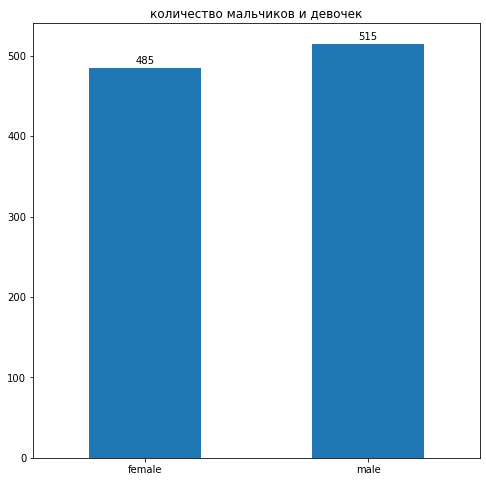

In [12]:
viz_counter_bar(df, 'gender', 'количество мальчиков и девочек')

Мальчиков и девочек примерно одинаково

#### race - раса

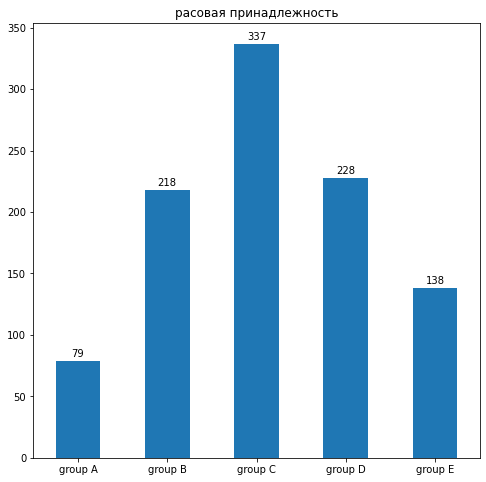

In [13]:
viz_counter_bar(df, 'race', 'расовая принадлежность', sort_by_index=True)

Больше всего из группы **С** , меньше всего из группы **A**. Но в целом некритично

#### parenteducation - образование родителей

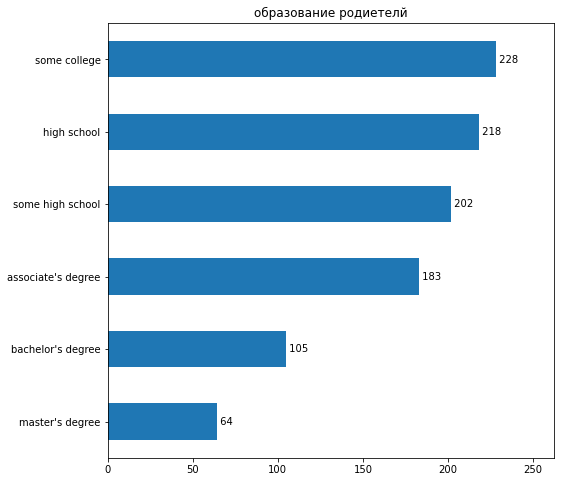

In [14]:
viz_counter_barh(df, 'parenteducation', 'образование родиетелй')

Больше всего образование в колледже, меньше всего ученая степень. Но разница некритична.

#### testprepcourse - подготовка к курсам

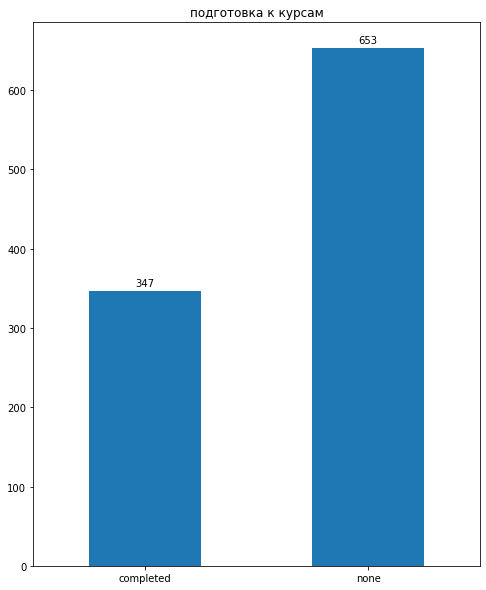

In [15]:
viz_counter_bar(df, 'testprepcourse', 'подготовка к курсам')

Большинство не готовится к курсам

#### оценки. - mathscore, readingscore, writingscore 

Похоже, что используется 100-бальная шкала оценок. Часть оценок с отрицательными значениями, заменим на положительные. 

In [16]:
df.loc[df.mathscore<0,'mathscore'] = df.loc[df.mathscore<0,'mathscore'].apply(lambda x: abs(x))
df.loc[df.readingscore<0,'readingscore'] = df.loc[df.readingscore<0,'readingscore'].apply(lambda x: abs(x))
df.loc[df.writingscore<0,'writingscore'] = df.loc[df.writingscore<0,'writingscore'].apply(lambda x: abs(x))

Принимаем нулевую гипотезу $H_0$ о том, что никакой разницы между оценками нет.   
Выдвигаем альтернативную гипотезу $H_A$ при уровне значимость $\alpha$=0.05, что различия все же есть.

C:\Users\evild\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\evild\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


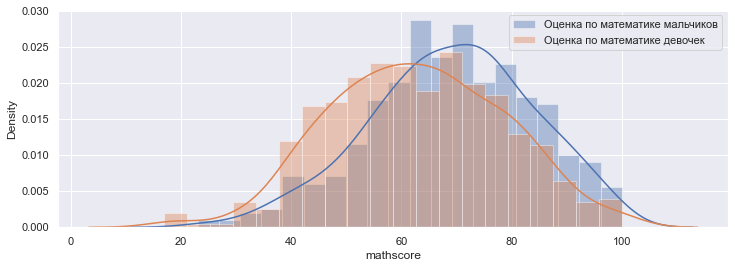

In [18]:
sns.set()
fig, ax = plt.subplots(figsize=[12, 4])
sns.distplot(df[df.gender=='male']['mathscore'], bins=20, label="Оценка по математике мальчиков")
sns.distplot(df[df.gender=='female']['mathscore'], bins=20, label="Оценка по математике девочек")
ax.legend(loc=1);

Если судить по графику, то оценки у мальчиков выше. Распределение нормальное, будем использовтаь t-тест.  
*прим.Проверим статистическим тестом позже*

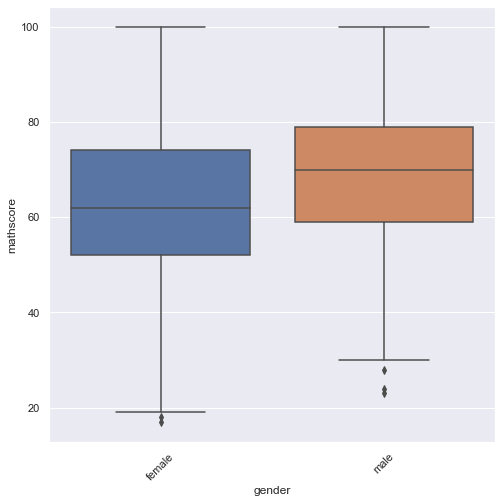

In [19]:
get_boxplot('gender')

Боксплоты показывают небольшие выбросы в низких оценках, но их не будем считать выбросами, это низкие оценки не более того.  

#### Проверка статистическим тестом   
Проверять будем подготовленной функцией, $\alpha=0.05$ 

In [20]:
mathstat = get_stat_dif('gender', 'mathscore', 0.05)

print ('%s НАЙДЕНЫ статистические различия в оценках по математике между мальчиками и девочками' % (
    '' if mathstat else 'НЕ'))


 НАЙДЕНЫ статистические различия в оценках по математике между мальчиками и девочками


### Вывод. 
Мальчики учатся лучше девочек, что видно по графикам распределния, боксплотам и тесту(0,05). 

### Задание 6

Вам предложены данные A/B теста. Проанализируйте, есть ли статистически значимая разница для конверсии в контрольной и экспериментальной группе.

Данные содержат 5 признаков:
    
* user_id - ID пользователя
* timestamp - Временная отметка
* group - К какой группе относится пользователь (контрольная или экспериментальная)
* landing_page - Какой дизайн показали пользователю {old_page, new_page}
* converted - Конверсия (0=not converted, 1=converted)

Не забудьте проверить и подготовить данные, сделать всю необходимую предобработку.

In [21]:
dfab = pd.read_csv('ab_data.csv')

dfab.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [22]:
dfab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


Пропусков нет. 

#### user_id - пользователи   
Посмотрим, сколько раз каждый пользователь заходил на сайт. 

In [23]:
dfab.user_id.value_counts().value_counts()

1    286690
2      3894
Name: user_id, dtype: int64

3894 пользователя заходили на сайт повторно. 

In [24]:
users_stats = dfab.user_id.value_counts()

In [25]:
# список пользователей, которые заходили на сайт повторно
users2 = users_stats.loc[users_stats==2].index.to_list() 

In [26]:
# Преобразуем столбец timestamp
dfab['timestamp'] = pd.to_datetime(dfab['timestamp'])

In [27]:
dfab[dfab.user_id.isin(users2)].head(3)

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
192,656468,2017-01-18 07:13:29.805052,treatment,new_page,1
226,773693,2017-01-23 18:05:45.167335,control,old_page,1


In [28]:
# группируем данные и оставляем только 2й заход каждым ползьзователем, индекс сохраняем в список
users2_last = dfab[dfab.user_id.isin(users2)].groupby('user_id')['timestamp'].nlargest(1).reset_index()
users2_second = users2_last.level_1.to_list()
users2_last.head(3)

,user_id,level_1,timestamp
0,630052,230259,2017-01-17 01:16:05.208766
1,630126,251762,2017-01-19 17:16:00.280440
2,630137,11792,2017-01-22 14:59:22.051308


Разделим исходный датафрейм на 2. df1 - для пользователей с первым посещением (он и нужен для решения основной задачи) и df2 - для тех, кто зашел повторно

In [29]:
df1 = dfab[~dfab.index.isin(users2_second)]
df2 = dfab[dfab.index.isin(users2_second)]

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   user_id       290584 non-null  int64         
 1   timestamp     290584 non-null  datetime64[ns]
 2   group         290584 non-null  object        
 3   landing_page  290584 non-null  object        
 4   converted     290584 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 13.3+ MB


#### группы пользователей и страницы

In [31]:
dfab.groupby(['group', 'landing_page'])['converted'].count().unstack()

landing_page,new_page,old_page
group,,
control,1928,145274
treatment,145311,1965


При A/B тестировании  одной группе (**control**) показывают старый дизайн (**old_page**) сайта, другой группе (**treatment**) показывают новый дизайн сайта (**new_page**). В данных есть 1949 значений, в которых нет этого соответствия.  
Можно удалить данные для пользователей с двумя заходами на сайт, но чтобы не терять данные, используем только первый заход ( **df1**) на сайт.  Нессответсввующие данные о странице и группе исправим (

In [37]:
df1.loc[df1.landing_page=='old_page', 'group'] = 'control'
df1.loc[df1.landing_page=='new_page', 'group'] = 'treatment'

In [38]:
df1.groupby(['group', 'landing_page'])['converted'].count().unstack()

landing_page,new_page,old_page
group,,
control,NaN,145293.0
treatment,145291.0,NaN


In [39]:
# группируем данные по группе и конверсии
conv_group = df1.groupby(['group', 'converted']).converted.size().unstack().reset_index()
conv_group

converted,group,0,1
0,control,127783,17510
1,treatment,128040,17251


#### Определяем необходимую выборку

In [40]:
effect_size = sms.proportion_effectsize(0.12, 0.14) # CTR 0.12-->0.14 
alpha = 0.05 
power = 0.8 # уровень мощности
power_analysis = sms.NormalIndPower()

sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)

print('Необходимый размер выборки: {0:.2f}'.format(sample_size))

sample_size = ceil(sample_size)

Необходимый размер выборки: 4432.46


In [41]:
contr_sample = df1[df1.group=='control'].sample(n=sample_size, random_state=123)
test_sample = df1[df1.group=='treatment'].sample(n=sample_size, random_state=123)
df_cut = pd.concat([contr_sample, test_sample], axis=0)

In [42]:
df_cut.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8866 entries, 86211 to 131134
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       8866 non-null   int64         
 1   timestamp     8866 non-null   datetime64[ns]
 2   group         8866 non-null   object        
 3   landing_page  8866 non-null   object        
 4   converted     8866 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 415.6+ KB


#### Текущие сравнения конверсии старой страницы с новой страницей.

In [43]:
df_cut.groupby('group')['converted'].agg(['mean', 'std'])

,mean,std
group,,
control,0.122265,0.327628
treatment,0.111211,0.314429


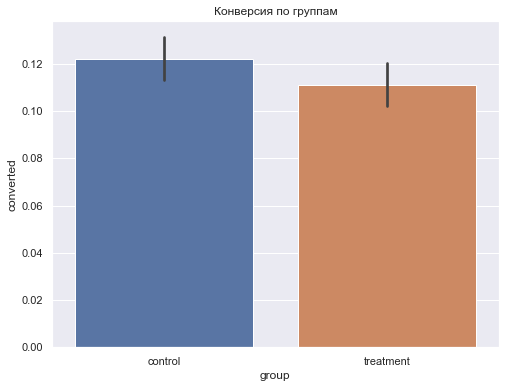

In [44]:
plt.figure(figsize=(8,6))
sns.barplot(x=df_cut['group'], y=df_cut['converted'])
plt.title('Конверсия по группам');

Если судить по цифрам и графикам, то на новой странице конверсия возможно стала хуже.

#### Тестирование гипотезы.    
Принимаем нулевую гипотезу $H_0$ что **CTR** не изменился и составляет 0.122. Тестируем альтернативную гипотезу с уровнем значимости $\alpha$  = 0.05

In [46]:
# Разделяем датасет на 2
control_results = df_cut[df_cut['group']=='control']['converted']
treatment_results = df_cut[df_cut['group']=='treatment']['converted']

In [49]:
converted = [control_results.sum(), treatment_results.sum()]
nobs = [sample_size, sample_size] # количество данных, одинаково и равно sample_size 

z_stat, pval = proportions_ztest(converted, nobs=nobs)
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(converted, nobs=nobs, alpha=0.05)

print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')
print(f'95% доверительный интервал для контрольной группы: [{lower_con:.3f}, {upper_con:.3f}]')
print(f'95% доверительнйы интервал лоя тестовой группы : [{lower_treat:.3f}, {upper_treat:.3f}]')

z statistic: 1.62
p-value: 0.105
95% доверительный интервал для контрольной группы: [0.113, 0.132]
95% доверительнйы интервал лоя тестовой группы : [0.102, 0.120]


In [50]:
print (f'Альтернативная гипотеза: {pval < alpha}'.format())

Альтернативная гипотеза: False


**Вывод**:  **p**-value = 0.105, что выше $\alpha=0.05$  Мы не можем отвергнуть нулевую гипотезу в пользу альтернативной